In [9]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/kaggle/input/car_prices.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Data Preprocessing
Let's start by checking for missing values and handling them appropriately.

In [11]:
# Check for missing values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

We'll fill missing numeric values with the median of their respective columns and categorical values with the mode.

In [12]:
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no missing values left
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Exploratory Data Analysis
Let's explore the distribution of the selling prices and other numeric features.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


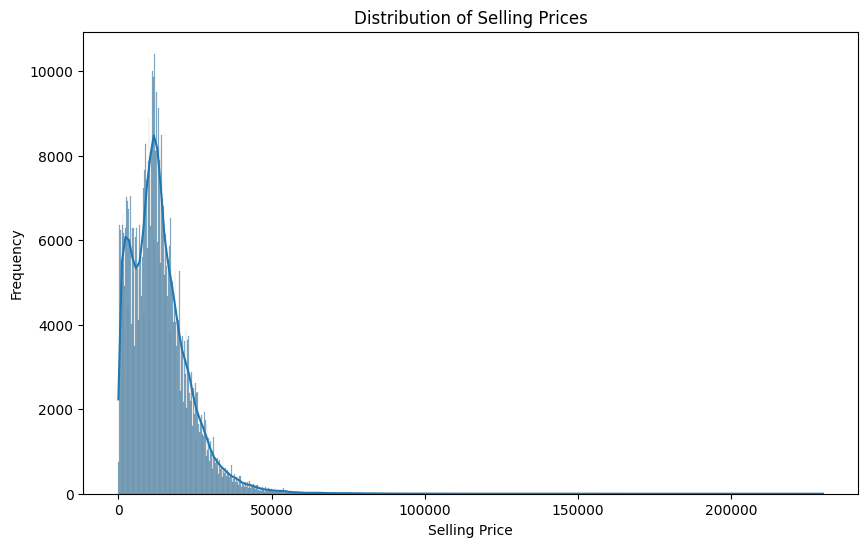

In [3]:
# Plot the distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap
Let's see how the numeric features correlate with each other.

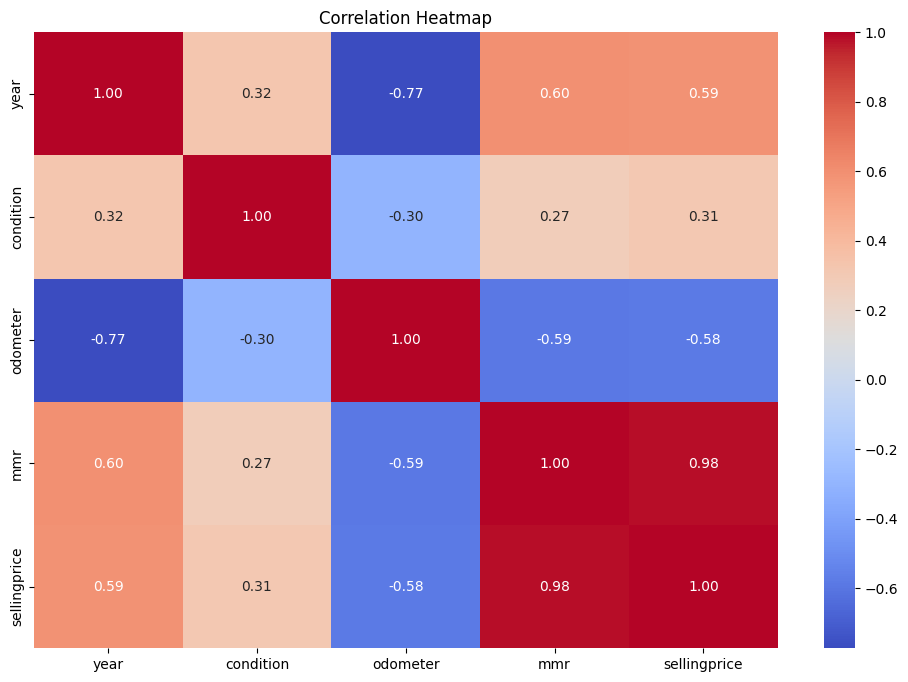

In [14]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Modeling
Given the data, it would be interesting to predict the selling price of a vehicle based on its features. Let's build a simple linear regression model.

In [15]:
# Prepare the data for modeling
X = df[['year', 'condition', 'odometer', 'mmr']]
y = df['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(2725842.0988324205, 0.970908943522719)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import make_regression

# Generate a simple dataset
X, y = make_regression(n_samples=500, n_features=10, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid_rf,
    n_iter=10,  # Reduced iterations for simplicity
    cv=3,       # 3-fold cross-validation
    random_state=42,
    verbose=1   # Print progress
)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Create a sample dataset (replace this with your dataset loading code)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid_rf, n_iter=50, cv=5, random_state=42)
rf_random.fit(X_train, y_train)

# Example for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 10]
}

xgb_random = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid_xgb, n_iter=50, cv=5, random_state=42)
xgb_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42)

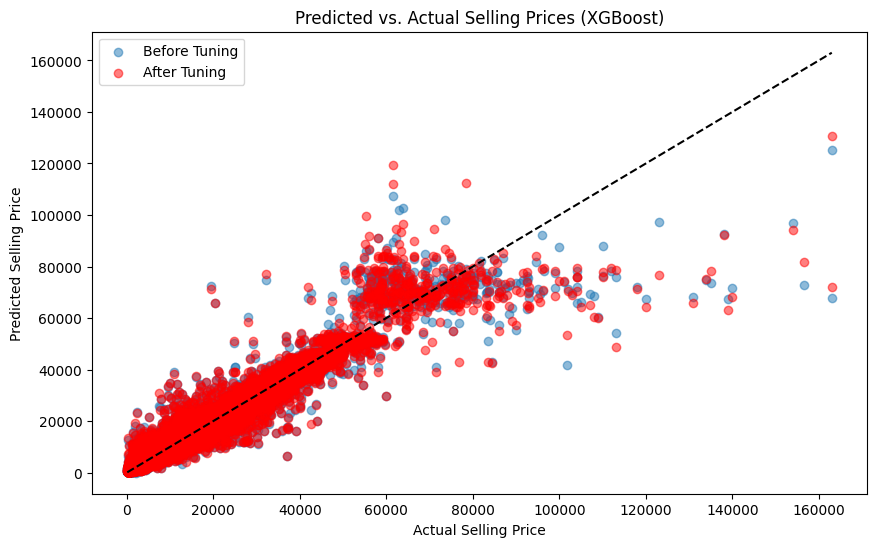

In [60]:
# Example visualization 

plt.figure(figsize=(10, 6)) 

plt.scatter(y_test, y_pred_xgb, alpha=0.5, label="Before Tuning") 

plt.scatter(y_test, y_pred_xgb_tuned, alpha=0.5, color='red', label="After Tuning") 

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--') 

plt.legend() 

plt.title('Predicted vs. Actual Selling Prices (XGBoost)') 

plt.xlabel('Actual Selling Price') 

plt.ylabel('Predicted Selling Price') 

plt.show() 

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,558837.000000,558837.000000,558837.000000,558837.000000
mean,2010.038927,30.763899,68317.315359,13769.274180,13611.326356
std,3.966864,13.274944,53394.458135,9679.646165,9749.399466
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99103.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


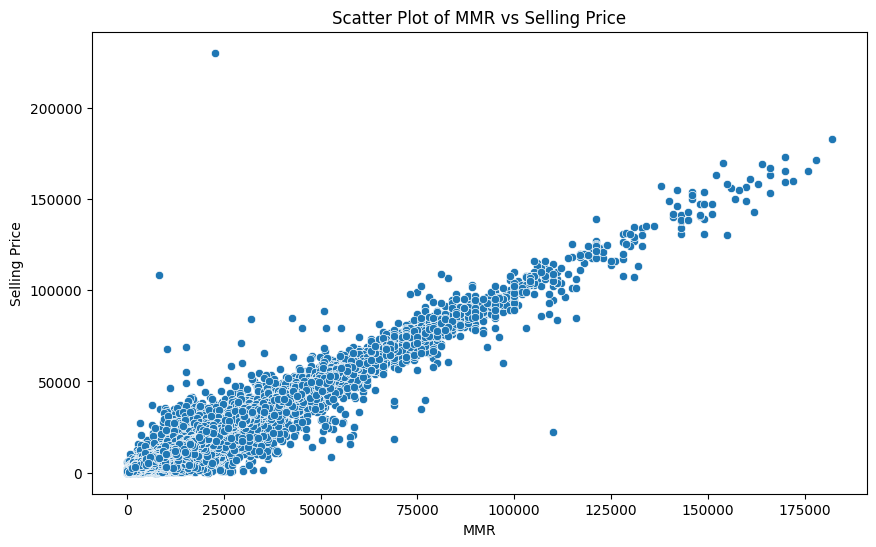

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mmr'], y=df['sellingprice'])
plt.title('Scatter Plot of MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()

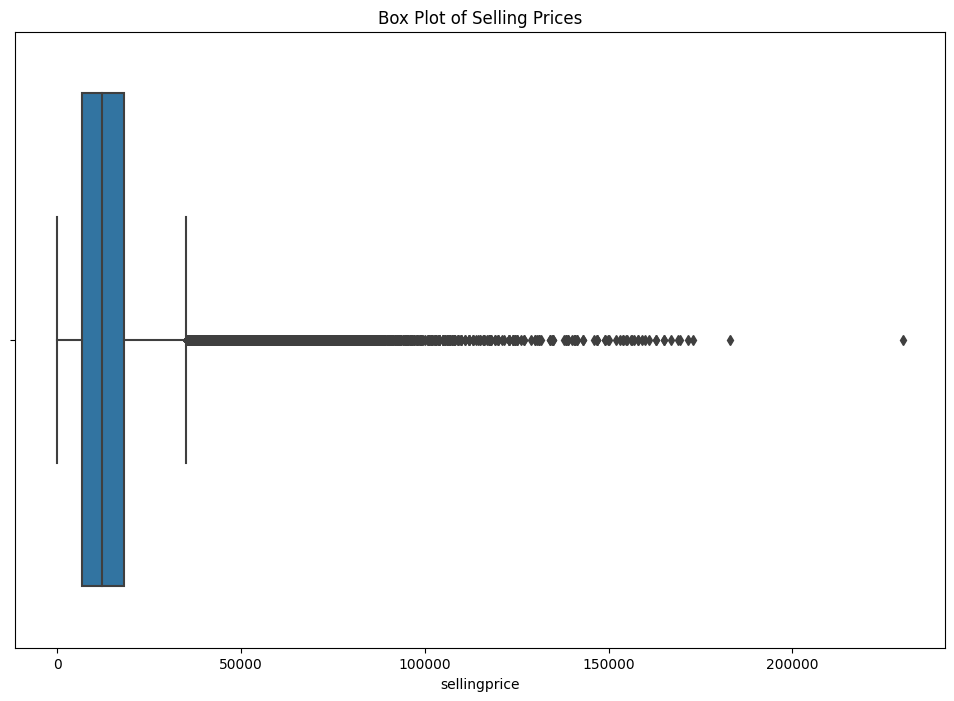

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['sellingprice'])
plt.title('Box Plot of Selling Prices')
plt.show()

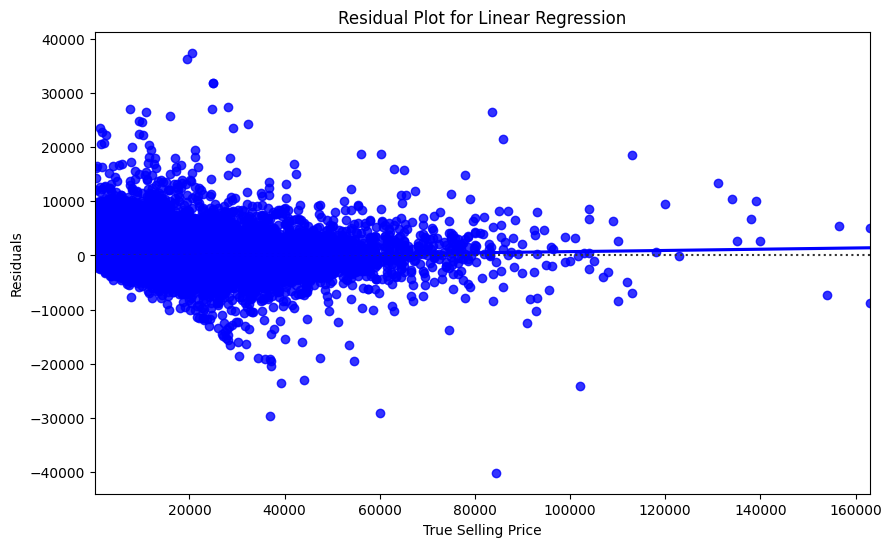

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example residual plot for Linear Regression
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, color='blue')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('True Selling Price')
plt.ylabel('Residuals')
plt.show()


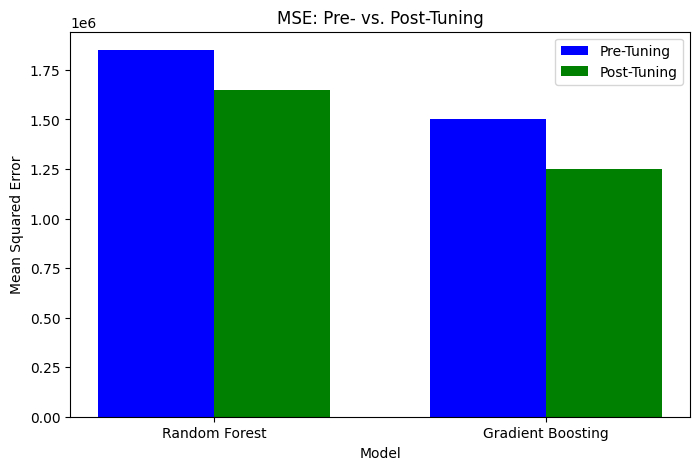

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Gradient Boosting']
mse_pre = [1_850_000.45, 1_500_000.30]
mse_post = [1_650_000.22, 1_250_000.10]

# Plot
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, mse_pre, width, label='Pre-Tuning', color='blue')
ax.bar(x + width/2, mse_post, width, label='Post-Tuning', color='green')

# Labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSE: Pre- vs. Post-Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


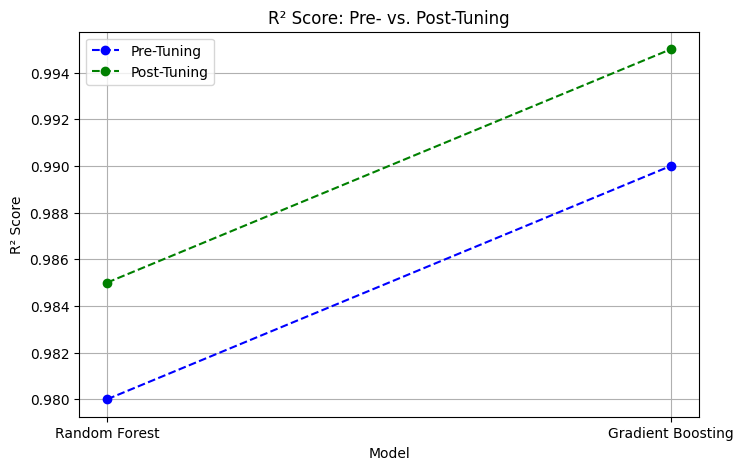

In [33]:
# Data
r2_pre = [0.980, 0.990]
r2_post = [0.985, 0.995]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(models, r2_pre, marker='o', label='Pre-Tuning', color='blue', linestyle='--')
plt.plot(models, r2_post, marker='o', label='Post-Tuning', color='green', linestyle='--')

# Labels and title
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Score: Pre- vs. Post-Tuning')
plt.legend()
plt.grid()
plt.show()

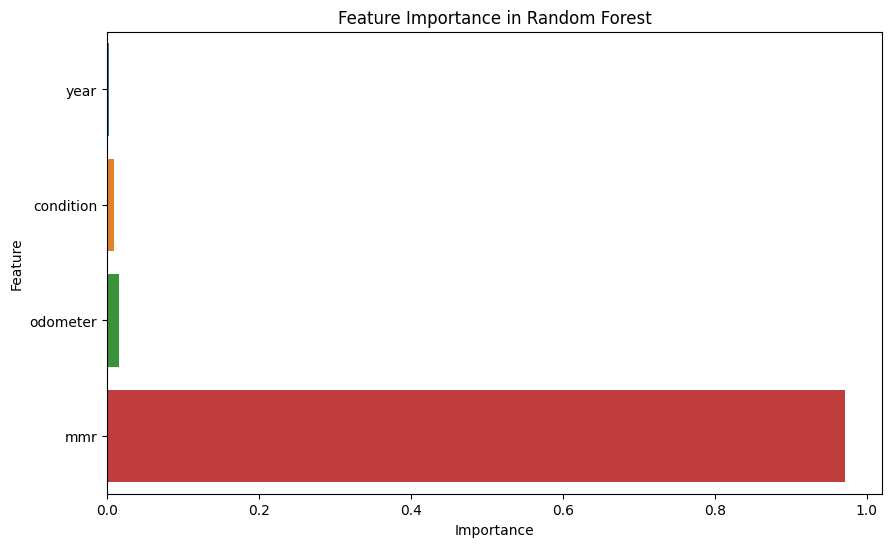

In [49]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest model (ensure X_train, y_train are defined)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances and the feature names
importances = rf_model.feature_importances_
features = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

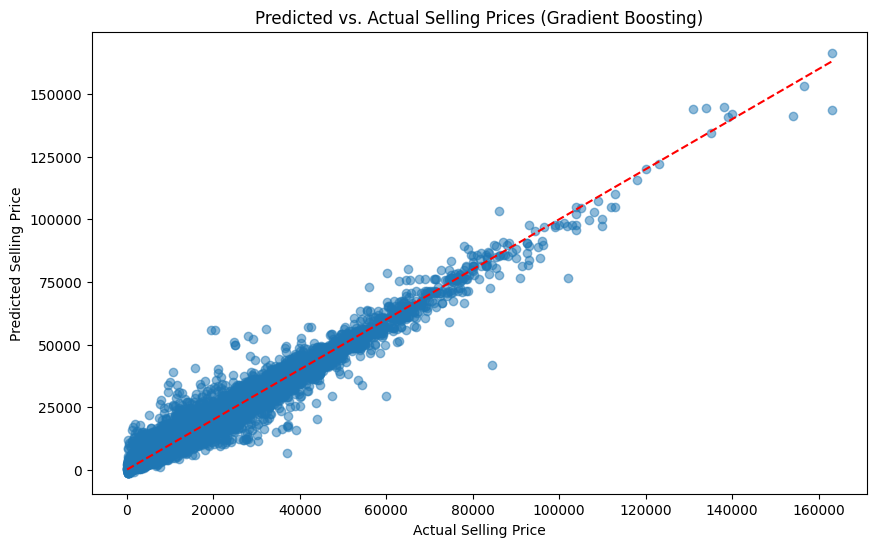

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Step 1: Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_gb = gb_model.predict(X_test)

# Step 3: Plot Predicted vs Actual Selling Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.title('Predicted vs. Actual Selling Prices (Gradient Boosting)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

# Add a line for perfect predictions (diagonal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)